# Largest inscribed polygon

What is the polygon ($n$ sides) of maximal area that can be completely contained inside a circle of radius 1?

### Model 1: polar coordinates

In [1]:
using Pkg
Pkg.add("Ipopt")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
using JuMP, PyPlot, Ipopt
n = 3

m = Model(Ipopt.Optimizer)
@variable(m, 0 <= r[1:n] <= 1 )
@variable(m, θ[1:n]  )

#@constraint(m, θ[1] == 0)

# impose an order to the angles
@constraint(m, θ[1] == 0)
for i = 1:n-1
    @constraint(m, θ[i+1] >= θ[i])
end

@NLobjective(m, Max, 0.5*sum( r[i]*r[i+1]*sin(θ[i+1]-θ[i]) for i=1:n-1) + 0.5*r[1]*r[n]*sin(θ[1]-θ[n]))
optimize!(m)

println(termination_status(m))
println("Optimal area: ", objective_value(m))
value.([r θ*180/π])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:       21

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        3
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality c

3×2 Matrix{Float64}:
 1.0    5.65948e-37
 1.0  120.0
 1.0  240.0

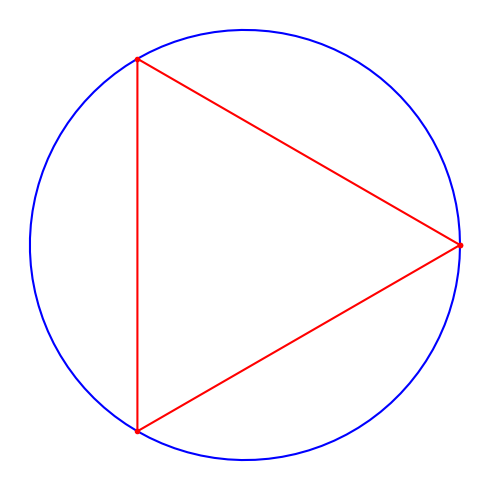

In [4]:
ropt = value.([r; r[1]])
topt = value.([θ; θ[1]])
# t = linspace(0,2π,100)
t = range(0,stop=2π,length=100) 
figure(figsize=[5,5])
plot( cos.(t), sin.(t), "b-" )
plot( ropt.*cos.(topt), ropt.*sin.(topt), "r.-" )
axis("equal");axis("off");tight_layout();

### Model 2: relative polar coordinates

In [5]:
using JuMP, PyPlot, Ipopt
n = 13

m = Model(Ipopt.Optimizer)
@variable(m, 0 <= r[1:n] <= 1 )
@variable(m, α[1:n] >= 0 )

# angles sum to 2π
@constraint(m, sum(α) == 2π)

@NLobjective(m, Max, 0.5*sum(r[i]*r[i+1]*sin(α[i]) for i=1:n-1) + 0.5*r[1]*r[n]*sin(α[n]) )

optimize!(m)

println(termination_status(m))
println("Optimal area: ", objective_value(m))
value.([r α*180/π])

This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       13
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       65

Total number of variables............................:       26
                     variables with only lower bounds:       13
                variables with lower and upper bounds:       13
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  6.4998722e-06 6.15e+00 1.00e-04  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

13×2 Matrix{Float64}:
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923
 1.0  27.6923

### Model 3: rectangular coordinates

In [6]:
# rectangular coordinates

using JuMP, Ipopt, Random
n = 6
m = Model(Ipopt.Optimizer)

@variable(m, x[1:n] )
@variable(m, y[1:n] )
   
@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=1:n-1)  +  0.5*(x[n]*y[1]-y[n]*x[1]) )

for i = 1:n
    @constraint(m, x[i]^2 + y[i]^2 <= 1)
end

# add ordering constraint to the vertices
for i = 1:n-1
    @NLconstraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end
@NLconstraint(m, x[n]*y[1]-y[n]*x[1] >= 0 )

Random.seed!(2367877)

set_start_value.(x,rand(n))
set_start_value.(y,rand(n))

# setvalue(x,rand(n))
# setvalue(y,rand(n))

optimize!(m)
println(termination_status(m))
println("Optimal area: ", objective_value(m))
value.([x y])

This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       36
Number of nonzeros in Lagrangian Hessian.............:       72

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       12
        inequality constraints with only lower bounds:        6
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.5861619e-02 3.26e-01 9.20e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

6×2 Matrix{Float64}:
  0.792007  -0.610512
  0.924723   0.380642
  0.132716   0.991154
 -0.792007   0.610512
 -0.924723  -0.380642
 -0.132716  -0.991154

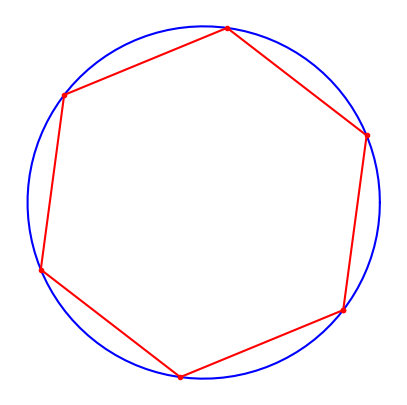

In [7]:
using PyPlot
xopt = value.([x; x[1]])
yopt = value.([y; y[1]])
t = range(0,stop=2π,length=100) 
figure(figsize=[5,5])
plot( cos.(t), sin.(t), "b-" )
plot( xopt, yopt, "r.-" )
axis("equal");axis("off");

In [8]:
using JuMP, Ipopt

m = Model(Ipopt.Optimizer)
@variable(m, x )
@NLobjective(m, Min, x^3 )

set_start_value.(x,.1)

optimize!(m)
println(termination_status(m))
value.(x)

This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-03 0.00e+00 3.00e-02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

4.8828125e-5